Text(0, 0.5, '$P(k)$ (Mpc$^3h^{-3}$)')

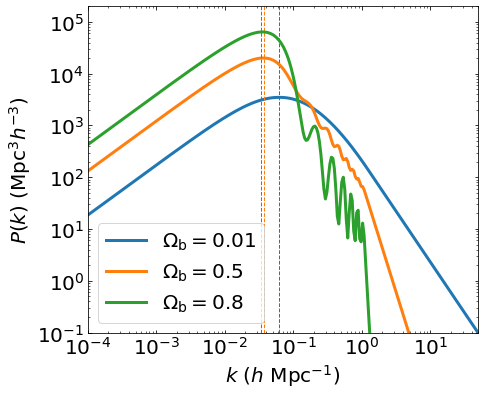

In [1]:
%matplotlib inline
from astropy.cosmology import FlatLambdaCDM, Planck15
from hmf import MassFunction
from matplotlib import pyplot as plt, rcParams
import numpy as np

sigma8 = 0.81
h = Planck15.h
cparams_eds = {'H0': 100*h, 'Om0': 1, 'Tcmb0': Planck15.Tcmb0}
cosmo_eds = FlatLambdaCDM(**cparams_eds)

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 3
fig, ax = plt.subplots(figsize=(7,6))
# Variando Omega_b
for i, Ob in enumerate((0.01, 0.5, 0.8)):
    cparams = cparams_eds.copy()
    cparams['Ob0'] = Ob
    cosmo = FlatLambdaCDM(**cparams)
    hmf = MassFunction(cosmo_model=cosmo, sigma_8=sigma8)
    if abs(Ob/cparams['Om0'] - 1)  < 0.01:
        label = r'$\Omega_\mathrm{{b}}=\Omega_\mathrm{{m}}={0}$'.format(Ob)
        print(hmf.power)
    else:
        label = r'$\Omega_\mathrm{{b}}={0}$'.format(Ob)
    ax.plot(hmf.k, hmf.power, 'C{0}'.format(i), label=label)
    ax.axvline(hmf.k[np.argmax(hmf.power)], ls='--', color='C{0}'.format(i), lw=1)
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-4, 50)
ax.set_ylim(0.1, 2e5)
ax.set_xlabel('$k$ ($h$ Mpc$^{-1}$)')
ax.set_ylabel('$P(k)$ (Mpc$^3h^{-3}$)')